# Two coupled oscillators

First let us solve the EOM for one oscillator.

Let us define the parameter $x_1$ as the displacement of the mass from the equilibrium.
Then the EOM can be written as: 

$F = -k x_1 = m \ddot x_1$

This equation is solved in general by $ x_1(t) = A \cos(\omega t +\phi_0)$ , where $\omega = \sqrt{k/m}$ and $\phi_0$ is a phase.

For simplicity let us set $\phi_0=0$. This choice is the same as the statement: The mass is at rest at $t=0$. The solution is then simply given by:  $ x_1(t) = A \cos(\omega t)$

To see at this trivial level how the dynamics is affected by the parameters k and m let's plot the dynamics.

In [2]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def x1 (t,B,k,m):    #define time dependence with parameter time t, amplitude B, k and mass m
    A = B*np.sin(math.sqrt(k/m)*t)
    return A;

In [4]:
#set the parameters
dt= 0.1
t = np.arange(0,40,dt) #set the time parameter in steps dt
k=1    #set the parameter k
m=1    #set the parameter m
A=1    #set the parameter A


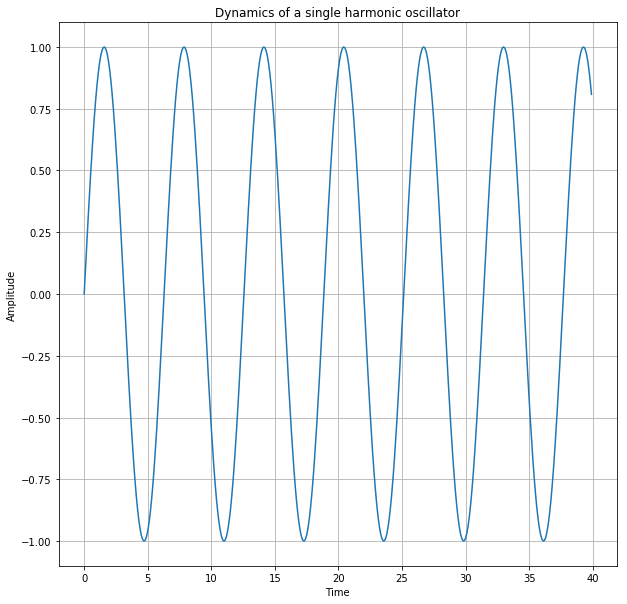

In [5]:
#do the plotting
plt.figure(figsize=(10,10))
plt.plot(t,x1(t,A,k,m))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Dynamics of a single harmonic oscillator')
plt.grid(True)

In [6]:
###Two coupled oscillators

![Title](Coupled_Harmonic_Oscillator.png)

Let's go to the case of two coupled harmonic oscillators. It is assumed that $m_1 = m_2 = m$. And the spring konstant k is also the same for both oscillators. The two oscillators are coupled through a spring with a spring constant $\kappa$. The new EOM to be solved are:

$ m \ddot x_1 = -(k+\kappa)x_1 +\kappa x_2$ 

$ m \ddot x_2 = -(k+\kappa)x_2+\kappa x_1$

One way to solve these equations is to note that if we add them, we get
$ m (\ddot x_1+  \ddot x_2) = -k(x_1+x_2)$ 
This is just the EOM for a harmonic oscillator with $y = x_1+x_2$. The solution is again
$(x_1+x_2)(t) = A_s \cos(\omega_s t + \phi_s)$, where $\omega_s = \sqrt{k/m}$

Another solution can be gained by substracting both equations:
$ m (\ddot x_1-  \ddot x_2) = (-k-2\kappa)(x_1-x_2)$. The solutoion is
$(x_1-x_2)(t) = A_f \cos(\omega_f t + \phi_f)$, where $\omega_f = \sqrt{(k+2\kappa)/m}$

These two solutions are called normal modes of the system. Note: $\omega_f > \omega_s$.

From these two normal modes the dynamics for the single oscillators can be written

$x_1 = \frac{1}{2}[A_s \cos(\omega_s t +\phi_s)+A_f \sin(\omega_f t + \phi_f)]$


$x_2 = \frac{1}{2}[A_s \cos(\omega_s t +\phi_s)-A_f \sin(\omega_f t + \phi_f)]$

To get a feeling how this solution and the solution for the normal modes depend on the parameter $k,\kappa,m,\phi_s$ and $\phi_f$ it is insideful to plot these. The procedure is the same as for the single oscillator.

First define the dynamics of the normal modes:

In [11]:

def norm_mod_slow (t,B,k,m,kappa=0,s_phi=0):
    A = B*np.sin(math.sqrt((k+2*kappa)/m)*t+s_phi)
    return A;
def norm_mod_fast (t,C,k,m,kappa,f_phi=0):
    A = np.sin(math.sqrt((k+2*kappa)/m)*t+f_phi)
    return A;

In [12]:
# set the parameters
dt=0.1
t = np.arange(0,100,dt)
k=4
kappa=0.4
m=2
As=0.5
Af=0.5
f_phi=0
s_phi=0


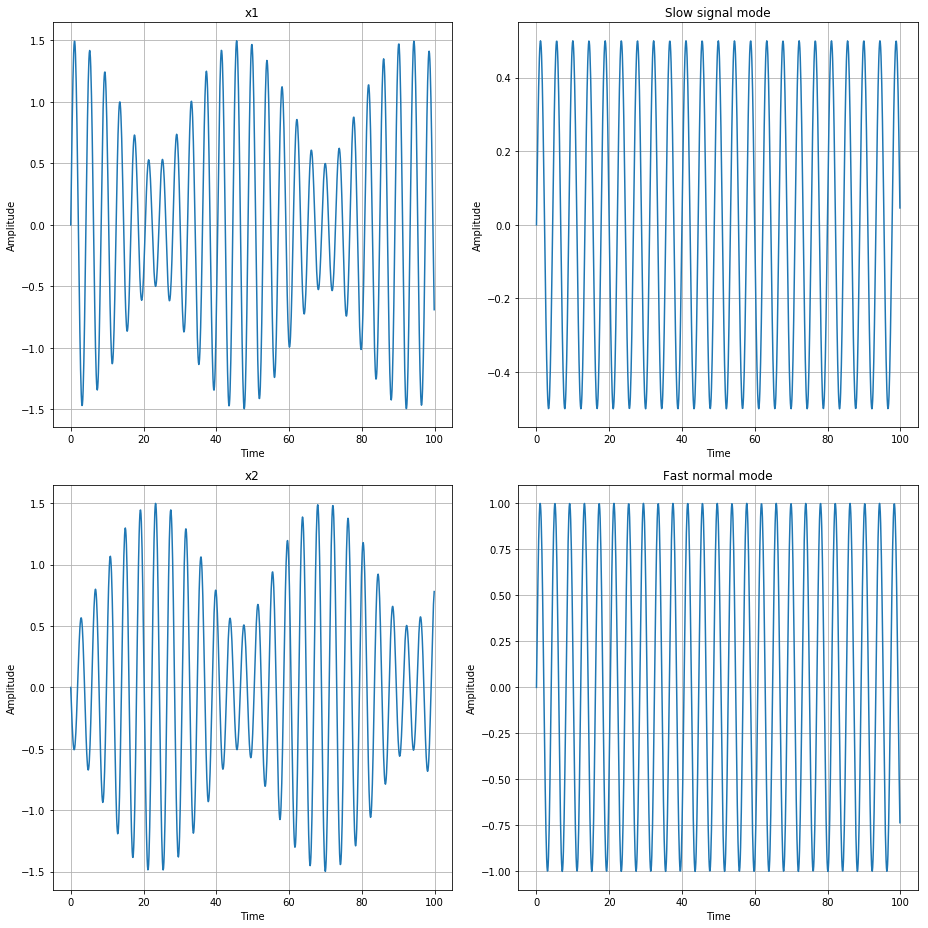

In [13]:
#do the plotting
fig, axs = plt.subplots(2, 2,figsize=(13,13))
axs[0,1].plot(t, norm_mod_slow(t,As,k,m))
axs[0,1].set_title("Slow signal mode")
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Amplitude")

axs[1,1].plot(t, norm_mod_fast(t,Af,k,m,kappa))
axs[1,1].set_title("Fast normal mode")
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Amplitude")

axs[0,0].plot(t, norm_mod_slow(t,As,k,m) + norm_mod_fast(t,Af,k,m,kappa))
axs[0,0].set_title("x1")
axs[0,0].set_xlabel("Time")
axs[0,0].set_ylabel("Amplitude")

axs[1,0].plot(t, norm_mod_slow(t,As,k,m) - norm_mod_fast(t,Af,k,m,kappa))
axs[1,0].set_title("x2")
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Amplitude")
fig.tight_layout()
axs[0,0].grid(True)
axs[1,0].grid(True)
axs[0,1].grid(True)
axs[1,1].grid(True)
plt.show()

In [14]:
### Driven harmonic oscillator

We also include a damping term besides the driving to make sure we get no divergence for the resonant case.
The EOM reads $ F_0 \cos(\omega t) = m \ddot x_1+b \dot x_1+k x_1$

The solution is given by: $ A_0 \sin(\omega t)$, with $A_0(\omega) = \frac{F_0}{m\sqrt{(\omega-\omega_0)^2+b^2\omega^2/m^2}}$. $\omega_0$ denotes the intrinsic frequency of the system.

In [15]:
def ampl(F_0,m,b,omega_0,omega):
    A = F_0/(m*(np.sqrt(np.square(omega-omega_0)+np.square(b)*np.square(omega)/np.square(m))))
    return A;

In [34]:
#set the parameters
step= 0.1
omega = np.arange(0,80,0.02) #set the time parameter in steps
omega_0= 20    #set the parameter k
m=2    #set the parameter m
F_0=1
b=0.01

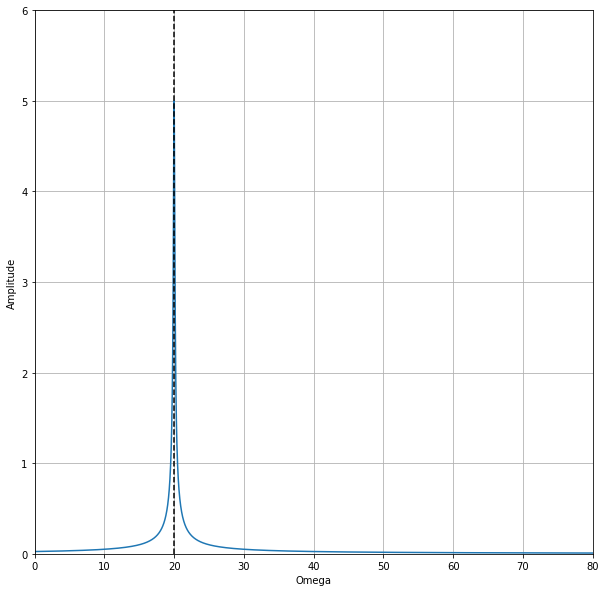

In [35]:
#do the plotting (limit b << 1)
plt.figure(figsize=(10,10))
plt.plot(omega,ampl(F_0,m,b,omega_0,omega))
plt.axvline(x=omega_0,color='k', linestyle='--',label='omega_reso')
plt.ylim([0,np.max(ampl(F_0,m,b,omega_0,omega))+1])
plt.xlim([0,np.max(omega)])
plt.xlabel('Omega')
plt.ylabel('Amplitude')
plt.grid(True)

In [41]:
# not finished